In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [69]:
df = pd.read_csv('alba_1.csv')

df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
5,Sub-Saharan Africa,South Africa,Beverages,Offline,H,7/10/2012,482292354,8/21/2012,9880,47.45,31.79,468806.00,314085.20,154720.80
6,Asia,Laos,Vegetables,Online,L,2/20/2011,844532620,3/20/2011,4825,154.06,90.93,743339.50,438737.25,304602.25
7,Asia,China,Baby Food,Online,C,4/10/2017,564251220,5/12/2017,3330,255.28,159.42,850082.40,530868.60,319213.80
8,Sub-Saharan Africa,Eritrea,Meat,Online,L,11/21/2014,411809480,1/10/2015,2431,421.89,364.69,1025614.59,886561.39,139053.20
9,Central America and the Caribbean,Haiti,Office Supplies,Online,C,7/4/2015,327881228,7/20/2015,6197,651.21,524.96,4035548.37,3253177.12,782371.25


In [70]:

print(df.info())
print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB
None
           Order ID    Units Sold    Unit Price     Unit Cost  Total Revenue  \
count  1.000000e+04  1000

Ну чисто описательная тема (тут все ясно, нулы там всякие отсутсвуют, Units Sold: 2873 → Сильная изменчивость размеров заказов.
Total Profit: $377K → Большие различия в прибыли между заказами (ну типо навар хороший).) Пропусков данных нет, на том спасибо, так что работаем


In [71]:

df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

# типо че по пропускам попускам 
missing_values = df.isnull().sum()


numeric_columns = ["Units Sold", "Unit Price", "Unit Cost", "Total Revenue", "Total Cost", "Total Profit"] #чтобы житие легче было 
df_numeric = df[numeric_columns].dropna()  # Удаляем строки с пропусками

# нормальное распределение (четкие ли челы?)
normality_tests = {col: stats.shapiro(df_numeric[col]) for col in numeric_columns}

# кол-во попусков и тест Шапиро-Уилка(Шапиро_улитка)
missing_values, normality_tests


/Users/maksim/PycharmProjects/pythonProject4/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.



(Region            0
 Country           0
 Item Type         0
 Sales Channel     0
 Order Priority    0
 Order Date        0
 Order ID          0
 Ship Date         0
 Units Sold        0
 Unit Price        0
 Unit Cost         0
 Total Revenue     0
 Total Cost        0
 Total Profit      0
 dtype: int64,
 {'Units Sold': ShapiroResult(statistic=np.float64(0.9564601737759267), pvalue=np.float64(2.598341660374719e-47)),
  'Unit Price': ShapiroResult(statistic=np.float64(0.8554461208566402), pvalue=np.float64(9.943315399252918e-70)),
  'Unit Cost': ShapiroResult(statistic=np.float64(0.8139090806440938), pvalue=np.float64(5.128365058317335e-75)),
  'Total Revenue': ShapiroResult(statistic=np.float64(0.8034849526405978), pvalue=np.float64(3.4916877350692874e-76)),
  'Total Cost': ShapiroResult(statistic=np.float64(0.7584387136660428), pvalue=np.float64(1.0982928433592908e-80)),
  'Total Profit': ShapiroResult(statistic=np.float64(0.8678058275170981), pvalue=np.float64(6.625160792882018e-6

По тесту САМОГО ШАПИРА-УИЛКА (в дальнейшем обозначим его как "Улитка") мы выяснили, что все p-value < 0.05, а значит ни один показатель не распределён нормально
как сказал инет, лучше делать непараметрические данные 



Что-то данные гавна поели

In [72]:

# Гистограммы + KDE
fig1 = px.histogram(df_numeric, x="Total Profit", marginal="box", nbins=50, title="Распределение прибыли")
fig2 = px.histogram(df_numeric, x="Total Revenue", marginal="box", nbins=50, title="Распределение выручки")




# Boxplot по регионам
fig4 = px.box(df, x="Region", y="Total Profit", title="Распределение прибыли по регионам")

# Вывод графиков Plotly
fig1.show()
fig2.show()

fig4.show()


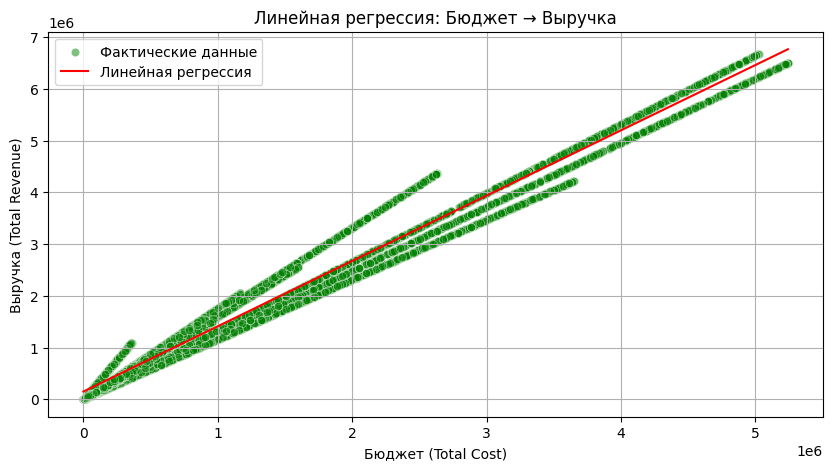

(np.float64(1.262974969827416),
 np.float64(148348.93089265237),
 0.9758943934740882,
 174915.81525781227,
 51732730242.10736)

In [73]:

# Подготовка данных для регрессии
df_regression = df_numeric.copy()
df_regression["Budget"] = df_regression["Total Cost"]  # Бюджет = совокупные затраты
df_regression["Revenue"] = df_regression["Total Revenue"]



X = df_regression[["Budget"]]
y = df_regression["Revenue"]


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Коэффициенты модели
coef = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Визуализация регрессии
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X["Budget"], y=y, color='green', alpha=0.5, label="Фактические данные")
sns.lineplot(x=X["Budget"], y=y_pred, color='red', label="Линейная регрессия")
plt.xlabel("Бюджет (Total Cost)")
plt.ylabel("Выручка (Total Revenue)")
plt.title("Линейная регрессия: Бюджет → Выручка")
plt.legend()
plt.grid()
plt.show()

# Выводим результаты
coef, intercept, r2, mae, mse


Всякие другие графики (красссииииво)

In [74]:
# Расчет матрицы корреляций
corr_matrix = df.select_dtypes(include=[np.number]).corr()

fig6 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Значения корреляций
    x=corr_matrix.columns,  # Названия столбцов по X
    y=corr_matrix.columns,  # Названия строк по Y
    colorscale='RdBu',  # Красно-синяя шкала
    zmin=-1,  # Минимальное значение
    zmax=1,  # Максимальное значение
    hoverongaps=False  # Показывать подсказки
))
fig6.update_layout(title='Матрица корреляций числовых показателей')
fig6.write_html('6.html')

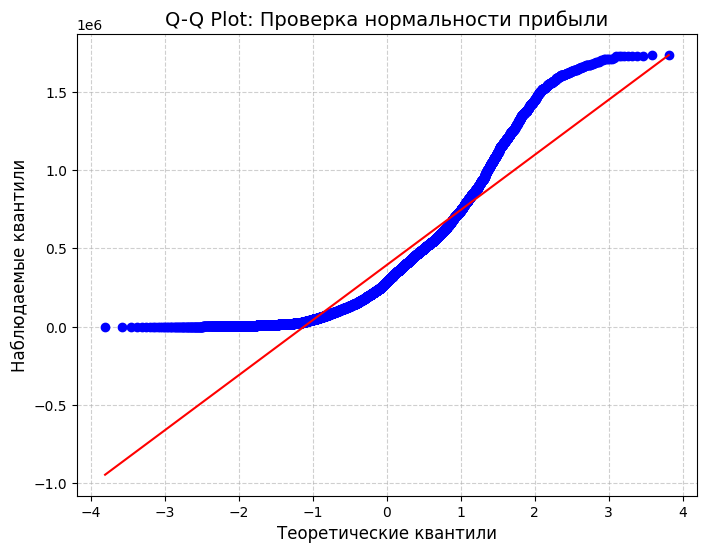

In [75]:
data = df["Total Profit"]


plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)


plt.title("Q-Q Plot: Проверка нормальности прибыли", fontsize=14)
plt.xlabel("Теоретические квантили", fontsize=12)
plt.ylabel("Наблюдаемые квантили", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Показываем график
plt.show()

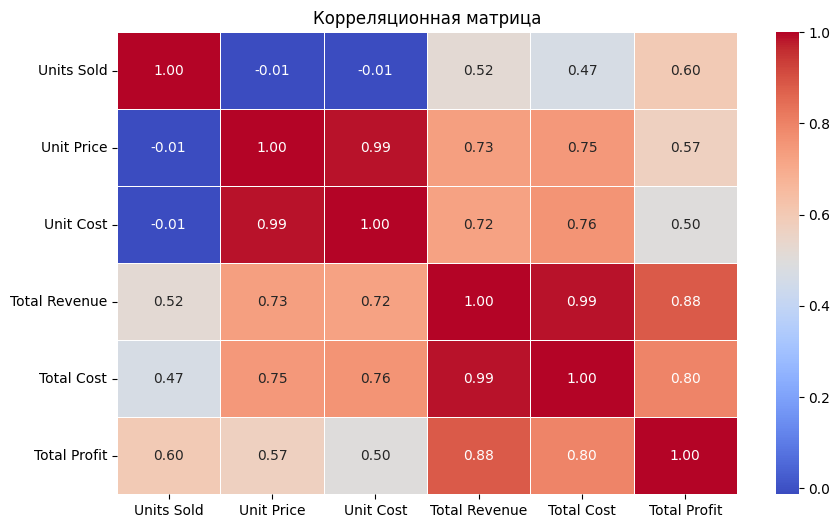

In [76]:
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [77]:
import plotly.express as px
import plotly.graph_objects as go

# Рассчитываем корреляционную матрицу
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Создаем график с использованием plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=correlation_matrix.round(2).values,  # Аннотируем каждую ячейку значением корреляции
    hovertemplate='%{x} <br>%{y}: %{text}<extra></extra>',  # Добавляем подсказку при наведении
))

# Добавляем титул и показываем график
fig.update_layout(
    title='Корреляционная матрица',
    xaxis_title='Переменные',
    yaxis_title='Переменные',
    width=800, height=600
)

fig.show()


In [78]:
# Расчет матрицы корреляций
corr_matrix = df.select_dtypes(include=[np.number]).corr()

fig6 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Значения корреляций
    x=corr_matrix.columns,  # Названия столбцов по X
    y=corr_matrix.columns,  # Названия строк по Y
    colorscale='RdBu',  # Красно-синяя шкала
    zmin=-1,  # Минимальное значение
    zmax=1,  # Максимальное значение
    hoverongaps=False  # Показывать подсказки
))
fig6.update_layout(title='Матрица корреляций числовых показателей')
# fig6.write_html('6.html')
fig6.show()

In [83]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days
# 1. Распределение времени обработки заказов
fig1 = px.histogram(df, x='Processing Time', nbins=30, 
                   title='Распределение времени обработки заказов',
                   labels={'Processing Time': 'Дни обработки'},
                   color_discrete_sequence=['#636EFA'])
fig1.update_layout(bargap=0.1)
fig1.show()

# 2. Анализ прибыли по регионам
fig2 = px.box(df, x='Region', y='Total Profit', 
             title='Распределение прибыли по регионам',
             color='Region')
fig2.update_layout(xaxis_title='Регион', yaxis_title='Прибыль')
fig2.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Рассчитываем корреляционную матрицу для числовых переменных
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Используем go.Heatmap для построения тепловой карты
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,  # Значения корреляции
    x=correlation_matrix.columns,  # Названия столбцов
    y=correlation_matrix.columns,  # Названия строк
    colorscale='Viridis',  # Цветовая палитра
    zmin=-1, zmax=1,  # Диапазон значений корреляции
    colorbar=dict(title='Корреляция')  # Легенда
))

# Настройки заголовка и осей
fig.update_layout(
    title='Корреляционная матрица',
    xaxis=dict(title='Переменные'),
    yaxis=dict(title='Переменные'),
    width=800,
    height=600
)

# Отображаем график
fig.show()
